# Car Price Prediction

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
#dependent variable is price
df = pd.read_csv('udemy_data/1.04. Real-life example.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


<h3>Preprocessing</h3>

In [3]:
#describe first
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


- We can see that there are 312 unique model, it will hard to solve for regression so we need to delete this column

In [4]:
df = df.drop(['Model'], axis=1)
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<b>Dealing with Missing Value</b>

In [5]:
df.isnull().sum() #count the null value each feature

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = df.dropna(axis=0) #delete all missing value data without replace or change

In [8]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [9]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<b>Exploreing the PDFs</b>

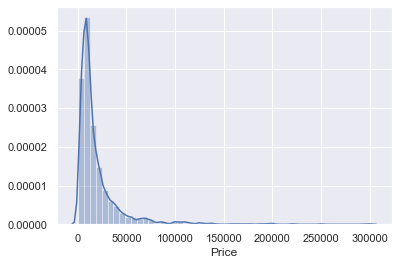

In [10]:
sns.distplot(data_no_mv['Price'])

- We can see that the mean price is 19552, min 6000 25% 6999 50% 11500 75% 21900 max 300000 (from descibe method)
- This is so far for our model, the conclusion is: there are a lot of outlier in this data, so we need to delete
- delete top 1% outlier (or u can use IQR method)

<b>Dealing with Outlier</b>

In [11]:
q = data_no_mv['Price'].quantile(0.99) #we take 1% from max value price
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


- Count data decrease from 4025 to 3984
- max price decrease from 300.000 to 129.222

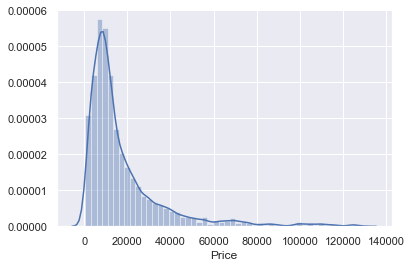

In [13]:
sns.distplot(data_1['Price'])
#data still distributed in the same way, but with less outlier

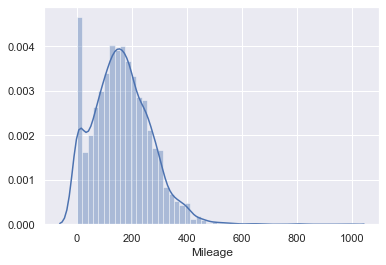

In [14]:
#milage
sns.distplot(data_no_mv['Mileage'])

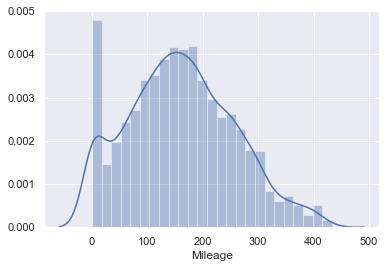

In [15]:
q2 = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q2]
sns.distplot(data_2['Mileage'])

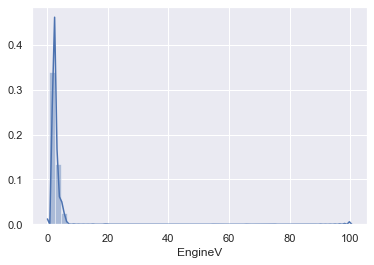

In [16]:
#EngineV
sns.distplot(data_no_mv['EngineV'])

- When we searching, the normal engine volume between 0.6-6.5, so just take the data with EngineV between less then 6.5

In [17]:
data_3 = data_2[data_2['EngineV']<6.5]

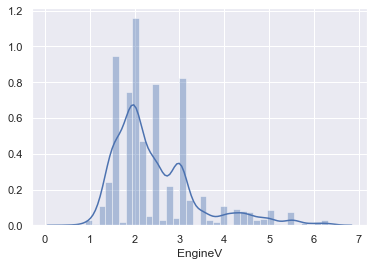

In [18]:
sns.distplot(data_3['EngineV'])

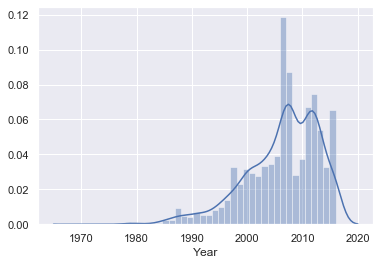

In [19]:
#year
sns.distplot(data_no_mv['Year'])

- the problem is the low end (most cars ire newer)

In [20]:
q3 = data_no_mv['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q3]

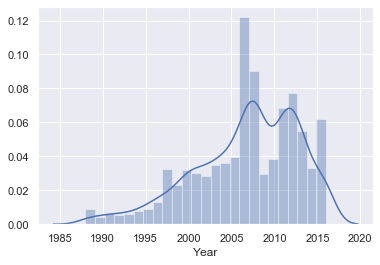

In [21]:
sns.distplot(data_4['Year'])

In [22]:
data_clean = data_4.reset_index(drop=True) #we just need the new index data that need to analysis
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


<b>Check the OLS assumptions</b>

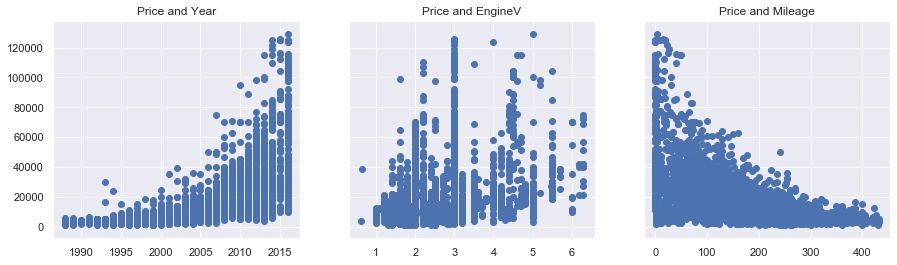

In [23]:
#check the linearity 
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize = (15,4))
ax1.scatter(data_clean['Year'], data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['Price'])
ax3.set_title('Price and Mileage')
plt.show()

From three graph we no that the data is not linear once<br>
So we should not run a linear regression on this case<br>
We should transform the variable

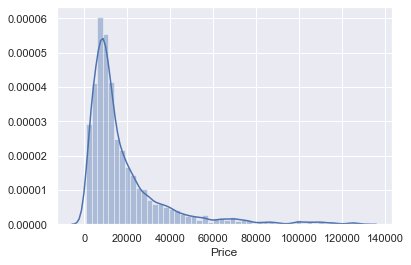

In [24]:
sns.distplot(data_clean['Price'])

- Becase the price isn't normally distribution, so the relations with other rather normally distributed  feature is not linear.
- The price pattern is exponential
- Log transformation is special usefull when facing exponential relationships

<b>Relaxing the assumptions</b>

In [25]:
log_price = np.log(data_clean['Price'])
data_clean['log_price']= log_price
#in this case, because price change to log_price you can delete the price
data_clean=data_clean.drop(['Price'], axis=1)
data_clean.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


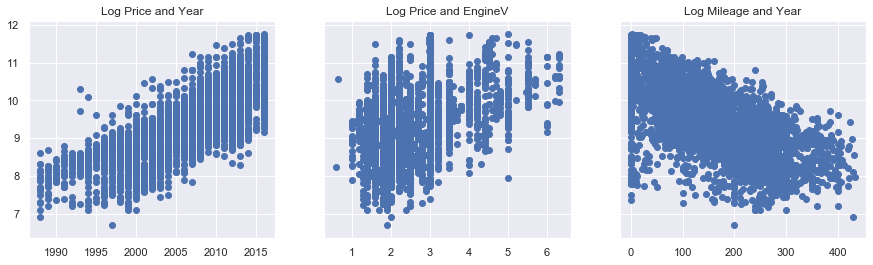

In [26]:
#see the scatter after transformation
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize = (15,4))
ax1.scatter(data_clean['Year'], data_clean['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_clean['EngineV'], data_clean['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_clean['Mileage'], data_clean['log_price'])
ax3.set_title('Log Mileage and Year')
plt.show()
#you will see the linear patter in all plots

<b>Multicollinearity Checking</b>

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = data_clean[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['Features'] = variable.columns
vif['VIF']= [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]

In [28]:
vif

,Features,VIF
0,Mileage,3.794319
1,Year,10.360888
2,EngineV,7.660317


VIF  = 1. No multicollinearity<br>
1<vif<5: prefect<br>
else : unacceptable<br>
for our example it seems like a year is difinitely too corelated with the other variables, so I just remove the year

In [29]:
data_no_multicollinearity= data_clean.drop(['Year'], axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,8.779557


<b>Create Dummy Variable</b>

In [30]:
data_no_multicollinearity['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [31]:
#drop first true tomake the dummys n-1, not make audi dummy, so if all data 0 0 0 0, it is audi
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


<b>Rearange the column</b><br>
Move the log price to the left side to make it easy for read the data

In [33]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [34]:
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[col]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


<b>Linear Regression Model</b>

In [35]:
#declare the input and targer
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

In [36]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
input_scaled = scaler.transform(inputs)

<b>Train Test Split</b>

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state=365)

<b>Create the regression</b>

In [39]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_hat = reg.predict(x_train) #compare the value of y_train and y_hat

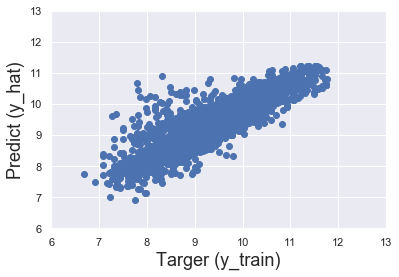

In [41]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targer (y_train)', size = 18)
plt.ylabel('Predict (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

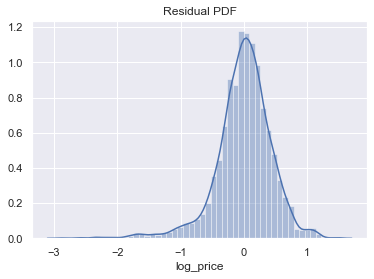

In [42]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF')

- mean already 0
- but the tail is too long

In [43]:
reg.score(x_train,y_train) #The coefficient R^2

0.7415645182486199

<b>Fainding Weight and bias</b>

In [44]:
reg.intercept_

9.413280072375791

In [45]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [46]:
reg_summary = pd.DataFrame(inputs.columns, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


From this coef we know that, if weight is minus it will dicrease the price while pluse, it will increase the price

In [47]:
data_clean['Brand'].unique()
#audi is the bachmark, so the weight is 0. If brand more then 0 so the price more expensive, if less then zero the price
#chipper than audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

<b>Testing</b>

In [48]:
y_hat_test = reg.predict(x_test)

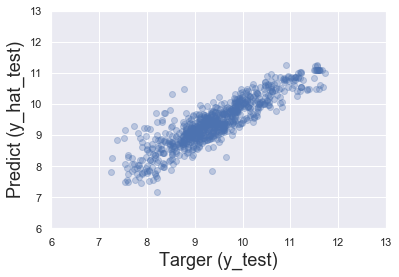

In [49]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel('Targer (y_test)', size = 18)
plt.ylabel('Predict (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()
#more saturated the color, he higher the concentration

In [50]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf.head()

,Predictions
0,9.273356
1,8.992378
2,8.824541
3,8.936821
4,9.333425


- this is the log prices predict, so we have to change to the real price by 
- If we take the exponentials of the log prices, we will get the original prices
- Using numpy exp

In [51]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [52]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10650.438709,NaN
1,8041.555683,7900.0
2,6799.069945,NaN
3,7606.977689,NaN
4,11309.799759,NaN


In [53]:
y_test

1192     7.740664
2752     9.487972
3752     8.999619
3256     8.764053
892      9.121509
          ...    
2044    10.292146
2957     8.575462
3133     9.814656
1369    11.134589
2594     9.287301
Name: log_price, Length: 774, dtype: float64

In [54]:
#see that the data have own index, so we have to reset the index first
y_test = y_test.reset_index(drop=True)
y_test

0       7.740664
1       9.487972
2       8.999619
3       8.764053
4       9.121509
         ...    
769    10.292146
770     8.575462
771     9.814656
772    11.134589
773     9.287301
Name: log_price, Length: 774, dtype: float64

In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0


In [56]:
df_pf['Residual'] = df_pf['Predictions']-df_pf['Target']

In [57]:
df_pf['Difference (100%)'] = np.absolute(df_pf['Residual']/df_pf['Target']*100) 

In [58]:
df_pf

,Predictions,Target,Residual,Difference (100%)
0,10650.438709,2300.0,8350.438709,363.062553
1,8041.555683,13200.0,-5158.444317,39.079124
2,6799.069945,8100.0,-1300.930055,16.060865
3,7606.977689,6400.0,1206.977689,18.859026
4,11309.799759,9150.0,2159.799759,23.604369
...,...,...,...,...
769,14874.949923,29500.0,-14625.050077,49.576441
770,5735.556226,5300.0,435.556226,8.218042
771,13623.775492,18300.0,-4676.224508,25.553139
772,28096.133846,68500.0,-40403.866154,58.983746


In [59]:
df_pf.describe()
#see the minimum difference(100%), that's very little. So the output was spot on (sesuai target) 

,Predictions,Target,Residual,Difference (100%)
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,-2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-80642.598057,0.056793
25%,7489.039002,6999.250000,-3293.698161,11.277214
50%,11561.730997,11500.000000,-150.474574,23.239276
75%,19726.158072,20500.000000,2013.351405,39.023878
max,77447.771561,124000.000000,29171.365746,507.418465


In [60]:
#wan to show some of data in pandas
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference (100%)'])

,Predictions,Target,Residual,Difference (100%)
264,11493.47,11500.00,-6.53,0.06
742,16985.25,16999.00,-13.75,0.08
60,12486.36,12500.00,-13.64,0.11
127,23257.55,23200.00,57.55,0.25
308,8876.92,8900.00,-23.08,0.26
242,7478.35,7500.00,-21.65,0.29
698,30600.22,30500.00,100.22,0.33
379,17733.15,17800.00,-66.85,0.38
114,27429.73,27300.00,129.73,0.48
317,11560.12,11500.00,60.12,0.52


- at the bottom, the prediction is much higher than target
- So how to improve our model? <br>
Use different set of variables<br>
Remove a bigger part of the outliers<br>
Use different kinds of transformations<br>
Or try not transform the price